In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [4]:
with open('/Users/apple1/desktop/kaggle/RentalListing/train.json') as data_file:    
    df_train = pd.read_json(data_file)

In [5]:
df_train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [6]:
with open('/Users/apple1/desktop/kaggle/RentalListing/test.json') as data_file:    
    df_test = pd.read_json(data_file)

In [7]:
print("Train Rows : ", df_train.shape[0])
print("Test Rows : ", df_test.shape[0])

Train Rows :  49352
Test Rows :  74659


# Distribution of Missing Value

In [8]:
df_train.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

In [9]:
df_test.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

# Distribution of Target Variable - Interest Level

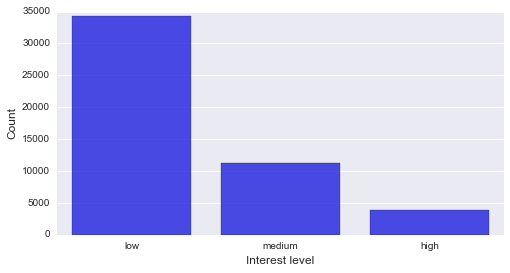

In [10]:
int_level = df_train['interest_level'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color="blue")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

# Distribution of Numeric Variables

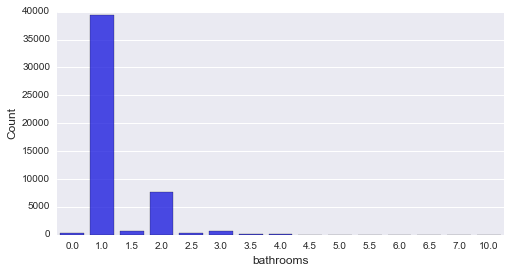

In [11]:
bathrooms = df_train['bathrooms'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(bathrooms.index, bathrooms.values, alpha=0.8, color="blue")
plt.ylabel('Count', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

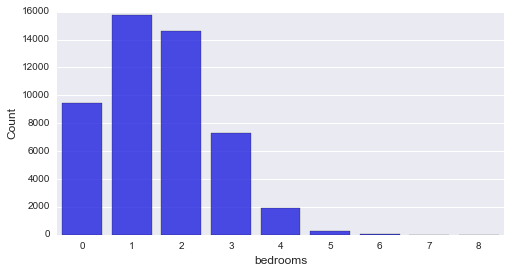

In [12]:
bedrooms = df_train['bedrooms'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(bedrooms.index, bedrooms.values, alpha=0.8, color="blue")
plt.ylabel('Count', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

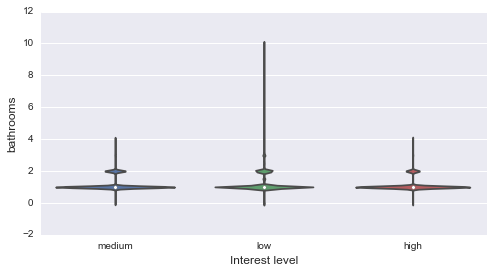

In [13]:
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=df_train)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('bathrooms', fontsize=12)
plt.show()

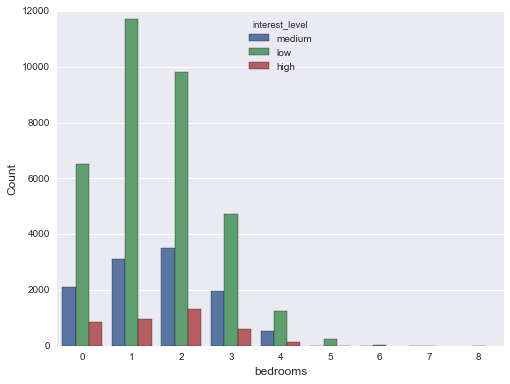

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=df_train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

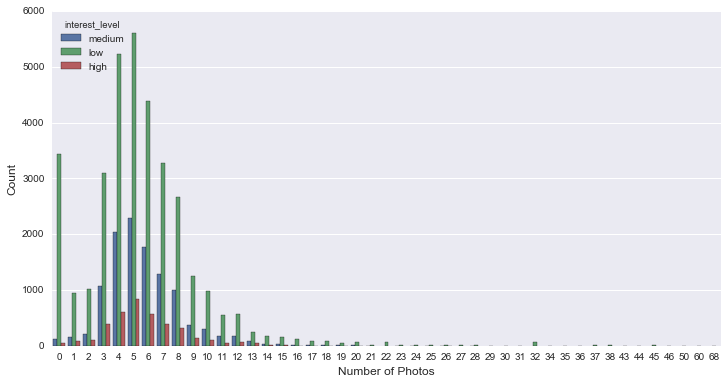

In [15]:
df_train["num_photos"] = df_train["photos"].apply(len)
plt.figure(figsize=(12,6))
sns.countplot(x="num_photos", hue="interest_level", data=df_train)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

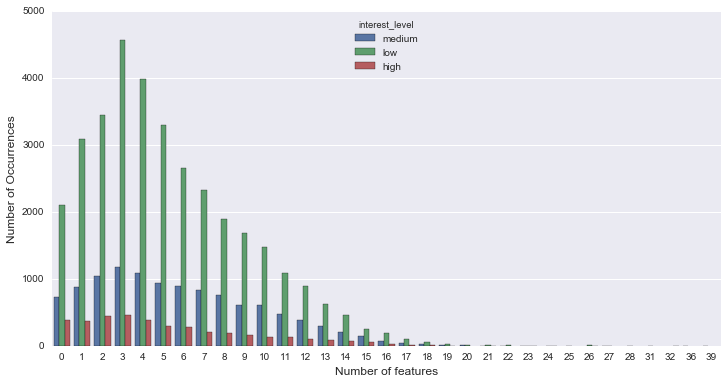

In [16]:
df_train["num_features"] = df_train["features"].apply(len)
plt.figure(figsize=(12,6))
sns.countplot(x="num_features", hue="interest_level", data=df_train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

In [ ]:
from wordcloud import WordCloud
train_df = df_train
text = ''
text_da = ''
text_desc = ''
for ind, row in train_df.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da,"_".join(row['display_address'].strip().split(" "))])
    #text_desc = " ".join([text_desc, row['description']])
text = text.strip()
text_da = text_da.strip()
text_desc = text_desc.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()

# wordcloud for display address
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_da)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Display Address", fontsize=30)
plt.axis("off")
plt.show()

#### Build subset of the dataframe based on interest level

In [17]:
Low_DF = df_train[df_train["interest_level"]=="low"]
Medium_DF = df_train[df_train["interest_level"]=="medium"]
High_DF = df_train[df_train["interest_level"]=="high"]

## Multi Collinearity

In [45]:
df_numeric = df_train[["bathrooms","bedrooms","price"]]

In [46]:
from sklearn import preprocessing

In [50]:
scaled_data = preprocessing.scale(df_numeric)  # Scale the data*
 
scaled_cars = pd.DataFrame(scaled_data,    # Remake the DataFrame
                           index=df_numeric.index,
                           columns=df_numeric.columns)

print(scaled_cars.describe() )

          bathrooms      bedrooms         price
count  4.935200e+04  4.935200e+04  4.935200e+04
mean   5.271490e-17  2.650905e-15  5.825623e-17
std    1.000010e+00  1.000010e+00  1.000010e+00
min   -2.417520e+00 -1.382628e+00 -1.716244e-01
25%   -4.231625e-01 -4.857723e-01 -6.027986e-02
50%   -4.231625e-01 -4.857723e-01 -3.082363e-02
75%   -4.231625e-01  4.110829e-01  1.222778e-02
max    1.752606e+01  5.792214e+00  2.033010e+02


In [51]:
df_numeric.ix[:,0:3].corr()  

,bathrooms,bedrooms,price
bathrooms,1.000000,0.533446,0.069661
bedrooms,0.533446,1.000000,0.051788
price,0.069661,0.051788,1.000000


In [52]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139f176a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1131e6cf8>]], dtype=object)

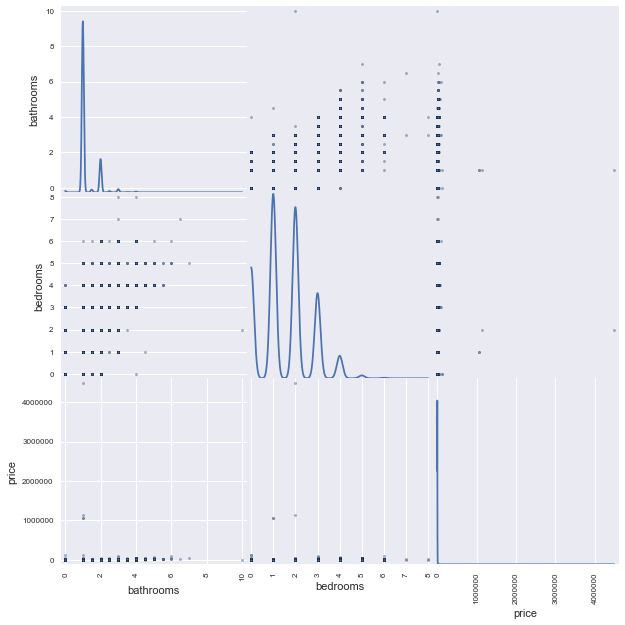

In [53]:
scatter_matrix(df_numeric.ix[:,0:6],   # Make a scatter matrix of 6 columns
               figsize=(10, 10),   # Set plot size
               diagonal='kde')     # Show distribution estimates on diagonal

From this plot we can see that there is a correlation between bathrooms and bedrooms.

In [18]:
df_train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,num_photos,num_features
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,5,0
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,11,5
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,8,4
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,3,2
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,3,1


In [20]:
df_train.drop('photos', axis=1, inplace=True)

In [21]:
df_train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,price,street_address,num_photos,num_features
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,3000,792 Metropolitan Avenue,5,0
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,5465,808 Columbus Avenue,11,5
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,2850,241 W 13 Street,8,4
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,3275,333 East 49th Street,3,2
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,3350,500 West 143rd Street,3,1


In [22]:
df_train.to_csv("dftrain.csv")